In [1]:
import torch
import seaborn as sea
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import pandas as pd
import time
import random
import datetime
import matplotlib.pyplot as plt
%run functions.ipynb
from unidecode import unidecode
plt.rcParams['figure.figsize'] = [15, 8]
pd.set_option("display.precision", 3)

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


get_avg(Player,games=26,categories=None)
get_stat(Player,category,stats=pd.DataFrame([])):
get_line(player,pp_stat)
moving_avg(Player,cat,window)
print_prob(player,series,line,cat,games=None,prnt=True)
graph_stat(player,cat,window)
dynamic(guy,cat,window=10)
get_game(player,date)
adjust(player,cat,opp)
best_odds(lines)
check(lines)
get_pos(guy)
season_stats(player)
position_diff(opp,cat)


In [2]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.min_rows', 8)

In [3]:
opp_stats = pd.read_csv('opponent_stats',index_col=0)
schedule = pd.read_csv('schedule',index_col=0)
data = pd.read_csv('data.csv')

lines = pd.read_csv('betting_lines_1',index_col=0)
lines2 =pd.read_csv('betting_lines_2',index_col=0)
lines3 =pd.read_csv('betting_lines_3',index_col=0)
lines4 =pd.read_csv('betting_lines_4',index_col=0)   
lines5 =pd.read_csv('betting_lines_5',index_col=0)   
lines6 =pd.read_csv('betting_lines_6',index_col=0)   
lines7 =pd.read_csv('betting_lines_7',index_col=0)
lines8 =pd.read_csv('betting_lines_8',index_col=0)

In [45]:
len(lines8['player_name'])

196

In [5]:
len(lines7)

187

In [6]:
data.tail(5)

Player  G        Date     Age   Tm  H/A  Opp      W/L  GS  \
19406      Trevor Keels  1  2022-10-21  19-056  NYK    1  DET  W (+24)   0   
19407   Marko Simonovic  1  2022-10-22  23-007  CHI    1  CLE  L (-32)   0   
19408   Marko Simonovic  2  2023-01-19  23-096  CHI    0  DET  W (+18)   0   
19409   Marko Simonovic  3  2023-02-16  23-124  CHI    1  MIL  L (-12)   0   
19410  Alondes Williams  1  2022-12-10  23-174  BRK    0  IND   W (+3)   0   

          MP  ...  TRB  AST  STL  BLK  TOV  PF  PTS  GmSc  +/-  Pos  
19406  0.950  ...    1    0    0    0    0   0    0  -0.4 -2.0   SG  
19407  1.733  ...    0    0    0    0    0   0    0  -0.7 -8.0    C  
19408  1.100  ...    0    0    0    0    0   0    0   0.0 -2.0    C  
19409  1.800  ...    0    0    0    0    0   1    0  -0.4  8.0    C  
19410  5.267  ...    1    0    0    0    2   1    0  -2.1 -5.0   SG  

[5 rows x 31 columns]

In [7]:
lines3.tail(3)

player_name team  line     stat     id        Date
280  Kevin Huerter  POR  17.5  PTS+AST  87615  2023-02-23
281  Kevin Huerter  POR  18.5  PTS+TRB  87615  2023-02-23
282  Kevin Huerter  POR  14.5      PTS  87615  2023-02-23

In [8]:
data.columns

Index(['Player', 'G', 'Date', 'Age', 'Tm', 'H/A', 'Opp', 'W/L', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-',
       'Pos'],
      dtype='object')

In [9]:
player_names = data['Player'].unique()
print(player_names[0:5])
print(len(player_names))

['Jayson Tatum' 'Luka Doncic' 'Shai Gilgeous-Alexander' 'Anthony Edwards'
 'Giannis Antetokounmpo']
503


In [10]:
lines7['player_name'].unique()

array(['Gordon Hayward', 'LaMelo Ball', 'Mark Williams', 'Terry Rozier',
       'Bam Adebayo', 'James Harden', 'Jimmy Butler', 'Joel Embiid',
       'Tobias Harris', 'Tyrese Maxey', 'Jayson Tatum', 'Julius Randle',
       'Marcus Smart', 'Jalen Brunson', 'Robert Williams III',
       'Mitchell Robinson', 'Al Horford', 'RJ Barrett', 'Derrick White',
       'Grant Williams', 'Josh Hart', 'CJ McCollum', 'Paolo Banchero',
       'Brandon Ingram', 'Markelle Fultz', 'Jonas Valanciunas',
       'Franz Wagner', 'Herbert Jones', 'Wendell Carter Jr.',
       'Gary Harris'], dtype=object)

PTS+AST
line: 23.5
Talen Horton-Tucker hits the PTS+AST line 1/48 times or 0.02 %
Talen Horton-Tucker hits the PTS+AST line 1/10 times in his last 10


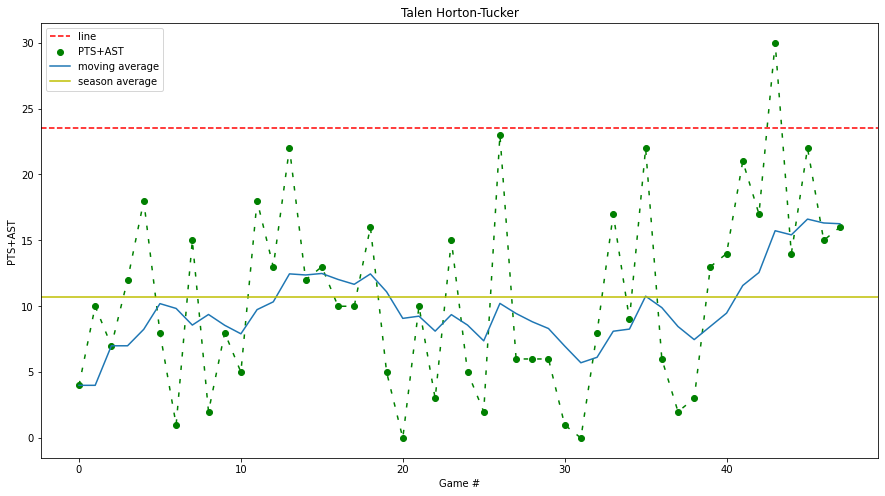

avg: 10.7


In [34]:
lines=lines8
graph_stat('Talen Horton-Tucker','PTS+AST',10)


In [12]:
x = opp_stats.loc[opp_stats['Team'] == 'CLE']
league = opp_stats.mean()

C:\Users\User\AppData\Local\Temp\ipykernel_8896\3499047109.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  league = opp_stats.mean()


In [13]:
adjust('Jayson Tatum','PTS+AST','CLE')

32.11295350076187

In [14]:
lines8['player_name'].unique()

array(['DeMar DeRozan', 'Fred VanVleet\t', 'Zach LaVine', 'Pascal Siakam',
       'Nikola Vucevic', 'Scottie Barnes', 'Patrick Beverley',
       'Jakob Poeltl', 'Coby White', 'Gary Trent Jr.', 'Patrick Williams',
       'Trae Young', 'Bradley Beal', 'John Collins', 'Kyle Kuzma',
       'Bogdan Bogdanovic', 'Giannis Antetokounmpo', 'Mikal Bridges',
       'Jrue Holiday', 'Spencer Dinwiddie', 'Brook Lopez',
       'Anthony Davis', 'Ja Morant', 'Malik Beasley', 'Desmond Bane',
       'Jarred Vanderbilt', 'Jaren Jackson Jr.', 'Dennis Schroder',
       'Dillon Brooks', 'Santi Aldama', 'Nikola Jokic',
       'Michael Porter Jr.', 'Josh Giddey', 'Tyrese Haliburton',
       'Luka Doncic', 'Buddy Hield', 'Kyrie Irving', 'Myles Turner',
       'Aaron Nesmith', 'Christian Wood', 'Lauri Markkanen',
       'Kelly Olynyk', 'Walker Kessler', 'Talen Horton-Tucker',
       'Keldon Johnson', 'Anthony Edwards', 'Kawhi Leonard',
       'Jeremy Sochan', 'Rudy Gobert', 'Paul George', 'Kyle Anderson',
      

In [15]:
odd = best_odds(lines8)
odd

Player     Stat  Season_avg  mov_avg  expected  line  Last_10  \
0     DeMar DeRozan      TRB         4.6      3.0       2.8   4.0      0.1   
1     DeMar DeRozan  TRB+AST         9.7      8.6       9.2   9.5      0.3   
2     DeMar DeRozan  PTS+AST        30.4     27.1      27.8  28.5      0.3   
3     DeMar DeRozan      AST         5.1      5.6       6.3   5.0      0.7   
..              ...      ...         ...      ...       ...   ...      ...   
185  Damian Lillard       FT         8.5     10.7      13.0   9.5      0.7   
186  Draymond Green       FT         1.1      0.9       0.8   0.5      0.6   
187    Jerami Grant       FT         4.3      3.9       3.6   4.0      0.5   
188    Jordan Poole       FT         4.1      4.1       4.3   5.0      0.1   

     Season  blend  
0     0.455  0.277  
1     0.509  0.405  
2     0.582  0.441  
3     0.418  0.559  
..      ...    ...  
185   0.383  0.541  
186   0.434  0.517  
187   0.436  0.468  
188   0.262  0.181  

[189 rows x 9 columns]

In [16]:
odd['Z'] = (odd['expected']-odd['line'])/odd['line']
odd.sort_values(by='Season')

Player     Stat  Season_avg  mov_avg  expected  line  \
170  Talen Horton-Tucker  PTS+AST        10.7     16.3      16.3  23.5   
169  Talen Horton-Tucker  PTS+TRB        10.4     15.3      15.1  22.5   
172  Talen Horton-Tucker  TRB+AST         5.6      9.5       9.1  11.5   
173  Talen Horton-Tucker      AST         3.0      5.2       5.2   6.0   
..                   ...      ...         ...      ...       ...   ...   
126          Buddy Hield  PTS+TRB        22.3     20.7      19.8  19.5   
125          Buddy Hield      PTS        17.4     16.2      15.5  15.5   
112    Tyrese Haliburton  TRB+AST        13.9     13.0      12.5  12.5   
18         Pascal Siakam      TRB         7.7      6.4       6.1   6.5   

     Last_10  Season  blend      Z  
170      0.1   0.021  0.060 -0.306  
169      0.1   0.062  0.081 -0.329  
172      0.3   0.104  0.202 -0.209  
173      0.4   0.125  0.263 -0.133  
..       ...     ...    ...    ...  
126      0.6   0.645  0.623  0.015  
125      0.6   0.661  0.631  0.000  
112      0.7   0.700  0.700  0.000  
18       0.4   0.712  0.556 -0.062  

[189 rows x 10 columns]

In [17]:
ordered = odd.sort_values(by=['blend'])
ordered

Player         Stat  Season_avg  mov_avg  expected  line  \
170  Talen Horton-Tucker      PTS+AST        10.7     16.3      16.3  23.5   
169  Talen Horton-Tucker      PTS+TRB        10.4     15.3      15.1  22.5   
155      Lauri Markkanen      PTS+AST        27.0     30.7      31.1  32.5   
188         Jordan Poole           FT         4.1      4.1       4.3   5.0   
..                   ...          ...         ...      ...       ...   ...   
87     Jaren Jackson Jr.  PTS+TRB+AST        24.2     24.0      24.2  23.5   
14         Pascal Siakam  PTS+TRB+AST        39.1     38.2      37.7  35.5   
88     Jaren Jackson Jr.      PTS+AST        17.6     17.5      17.1  16.5   
112    Tyrese Haliburton      TRB+AST        13.9     13.0      12.5  12.5   

     Last_10  Season  blend      Z  
170      0.1   0.021  0.060 -0.306  
169      0.1   0.062  0.081 -0.329  
155      0.1   0.196  0.148 -0.043  
188      0.1   0.262  0.181 -0.140  
..       ...     ...    ...    ...  
87       0.7   0.619  0.660  0.030  
14       0.7   0.635  0.667  0.062  
88       0.7   0.643  0.671  0.036  
112      0.7   0.700  0.700  0.000  

[189 rows x 10 columns]

In [56]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.min_rows', 20)
z = ordered.loc[ordered['Stat']=='TRB+AST']
#z = z.loc[z['Z']> 0]
z.sort_values(by='blend')

Player     Stat  Season_avg  mov_avg  expected  line  \
172  Talen Horton-Tucker  TRB+AST         5.6      9.5       9.1  11.5   
91       Dennis Schroder  TRB+AST         6.9      7.6       7.7  10.5   
136         Myles Turner  TRB+AST         9.3      9.4       9.1  10.5   
83     Jarred Vanderbilt  TRB+AST        10.6     10.9      11.2  11.5   
11           Zach LaVine  TRB+AST         8.9      8.5       8.8   9.0   
166       Walker Kessler  TRB+AST         8.7     12.8      13.8  12.5   
114          Luka Doncic  TRB+AST        16.9     14.8      14.4  16.5   
89     Jaren Jackson Jr.  TRB+AST         7.5      7.2       7.9   8.0   
1          DeMar DeRozan  TRB+AST         9.7      8.6       9.2   9.5   
34        Scottie Barnes  TRB+AST        11.8     10.6      11.1  11.5   
74          Desmond Bane  TRB+AST         9.1      9.5       9.7   9.0   
159         Kelly Olynyk  TRB+AST         8.7     10.8      11.8   9.5   
152      Lauri Markkanen  TRB+AST        10.4      9.9       9.2  10.5   
19         Pascal Siakam  TRB+AST        13.8     11.6      11.3  12.0   
69             Ja Morant  TRB+AST        14.1     13.9      14.0  14.5   
39          Jakob Poeltl  TRB+AST        12.1     12.9      12.3  11.5   
24        Nikola Vucevic  TRB+AST        14.8     15.3      14.4  14.5   
63         Anthony Davis  TRB+AST        14.9     15.9      15.0  15.5   
132         Kyrie Irving  TRB+AST        10.5     11.9      11.7  10.5   
112    Tyrese Haliburton  TRB+AST        13.9     13.0      12.5  12.5   

     Last_10  Season  blend      Z  
172      0.3   0.104  0.202 -0.209  
91       0.3   0.170  0.235 -0.267  
136      0.3   0.346  0.323 -0.133  
83       0.3   0.368  0.334 -0.026  
11       0.3   0.386  0.343 -0.022  
166      0.5   0.203  0.352  0.104  
114      0.3   0.500  0.400 -0.127  
89       0.4   0.405  0.402 -0.012  
1        0.3   0.509  0.405 -0.032  
34       0.4   0.508  0.454 -0.035  
74       0.5   0.432  0.466  0.078  
159      0.6   0.360  0.480  0.242  
152      0.5   0.482  0.491 -0.124  
19       0.4   0.615  0.508 -0.058  
69       0.6   0.460  0.530 -0.034  
39       0.6   0.500  0.550  0.070  
24       0.6   0.508  0.554 -0.007  
63       0.6   0.514  0.557 -0.032  
132      0.7   0.543  0.622  0.114  
112      0.7   0.700  0.700  0.000

In [19]:
ordered[ordered['Player']=='Jordan Clarkson']

Empty DataFrame
Columns: [Player, Stat, Season_avg, mov_avg, expected, line, Last_10, Season, blend, Z]
Index: []

In [20]:
odd = odd.sort_values(by=['Last_10'])
odd

Player         Stat  Season_avg  mov_avg  expected  line  \
0          DeMar DeRozan          TRB         4.6      3.0       2.8   4.0   
170  Talen Horton-Tucker      PTS+AST        10.7     16.3      16.3  23.5   
169  Talen Horton-Tucker      PTS+TRB        10.4     15.3      15.1  22.5   
155      Lauri Markkanen      PTS+AST        27.0     30.7      31.1  32.5   
98         Dillon Brooks      PTS+AST        17.2     12.0      11.9  14.5   
188         Jordan Poole           FT         4.1      4.1       4.3   5.0   
97         Dillon Brooks          PTS        14.6     10.2      10.3  11.5   
99         Dillon Brooks      PTS+TRB        17.9     13.1      13.2  15.5   
115          Luka Doncic          AST         8.1      6.5       6.5   7.5   
81     Jarred Vanderbilt  PTS+TRB+AST        19.0     19.0      19.7  20.5   
..                   ...          ...         ...      ...       ...   ...   
38          Jakob Poeltl  PTS+TRB+AST        24.4     26.7      26.1  23.5   
112    Tyrese Haliburton      TRB+AST        13.9     13.0      12.5  12.5   
40          Jakob Poeltl          PTS        12.3     13.9      13.8  11.5   
132         Kyrie Irving      TRB+AST        10.5     11.9      11.7  10.5   
129         Kyrie Irving  PTS+TRB+AST        37.5     38.7      39.2  35.5   
21         Pascal Siakam          PTS        25.3     26.6      26.5  23.5   
123          Buddy Hield           3P         3.8      3.9       3.3   3.5   
67             Ja Morant          TRB         5.9      6.4       6.2   6.5   
23        Nikola Vucevic          TRB        11.5     12.6      12.2  11.5   
14         Pascal Siakam  PTS+TRB+AST        39.1     38.2      37.7  35.5   

     Last_10  Season  blend      Z  
0        0.1   0.455  0.277 -0.300  
170      0.1   0.021  0.060 -0.306  
169      0.1   0.062  0.081 -0.329  
155      0.1   0.196  0.148 -0.043  
98       0.1   0.574  0.337 -0.179  
188      0.1   0.262  0.181 -0.140  
97       0.2   0.593  0.396 -0.104  
99       0.2   0.611  0.406 -0.148  
115      0.2   0.577  0.388 -0.133  
81       0.2   0.351  0.275 -0.039  
..       ...     ...    ...    ...  
38       0.7   0.462  0.581  0.111  
112      0.7   0.700  0.700  0.000  
40       0.7   0.519  0.610  0.200  
132      0.7   0.543  0.622  0.114  
129      0.7   0.587  0.643  0.104  
21       0.7   0.577  0.638  0.128  
123      0.7   0.613  0.656 -0.057  
67       0.7   0.420  0.560 -0.046  
23       0.7   0.541  0.620  0.061  
14       0.7   0.635  0.667  0.062  

[189 rows x 10 columns]

In [21]:
opp_stats.head()

Team  GP    PTS   FGM   FGA   FG%    3P   3PA   3P%    FT   FTA   FT%   ORB  \
0  CLE  63  106.7  39.0  83.6  46.7  11.4  30.9  37.0  17.2  22.1  77.9   9.3   
1  MIA  60  108.6  39.6  83.0  47.7  13.2  35.9  36.8  16.3  21.1  77.2   8.6   
2  PHI  58  110.4  40.2  85.4  47.0  11.1  32.6  34.2  18.9  24.0  78.6   9.8   
3  PHO  61  111.4  40.1  85.9  46.7  11.4  31.8  36.0  19.8  25.0  79.1  10.4   
4  MIL  59  111.4  41.7  92.2  45.2  11.5  33.6  34.3  16.5  21.2  77.7  10.6   

    DRB   TRB   AST  STL  BLK   TOV    PF  
0  31.0  40.3  23.0  7.3  4.2  14.3  20.9  
1  33.8  42.4  25.2  6.8  3.8  15.6  19.9  
2  32.3  42.1  23.8  6.7  4.9  14.2  19.9  
3  32.6  43.0  23.6  7.5  4.0  14.0  20.3  
4  33.5  44.1  22.8  7.1  4.1  11.7  19.0

In [22]:
player = 'Terry Rozier'
cat = 'PTS+TRB+AST'
date = '2023-02-13'
game  = get_game(player,date)
x = get_stat(player,cat,game)
game

Player   G        Date     Age   Tm  H/A  Opp     W/L  GS      MP  \
2033  Terry Rozier  49  2023-02-13  28-333  CHO    1  ATL  W (+6)   1  33.317   

      ...  TRB  AST  STL  BLK  TOV  PF  PTS  GmSc  +/-  Pos  
2033  ...    4    5    0    2    2   3   29  22.6  3.0   SG  

[1 rows x 31 columns]

In [23]:
odd_test = best_odds(lines6)
odd_test.sort_values(by='blend')

Player         Stat  Season_avg  mov_avg  expected  line  \
246      Cam Reddish  PTS+TRB+AST        12.4     15.2      14.6  18.5   
247      Cam Reddish      PTS+TRB        11.0     13.0      12.6  16.5   
248      Cam Reddish      PTS+AST        10.6     13.2      12.8  15.5   
250      Cam Reddish          PTS         9.3     11.1      10.8  13.5   
267     Jerami Grant          TRB         4.3      4.4       4.6   5.0   
257     Drew Eubanks  PTS+TRB+AST        12.2     16.3      14.6  18.5   
212  Anthony Edwards      PTS+AST        29.3     29.5      30.3  34.5   
259     Drew Eubanks      PTS+TRB        11.0     14.7      13.0  16.5   
249      Cam Reddish          TRB         1.7      1.9       1.8   2.5   
254   Damian Lillard      TRB+AST        11.6     12.8      12.7  14.5   
..               ...          ...         ...      ...       ...   ...   
232      Mike Conley      TRB+AST         9.9      9.3      10.0   9.5   
111     Kyrie Irving  PTS+TRB+AST        37.5     38.7      42.3  36.5   
96     Anthony Davis      TRB+AST        14.9     15.9      15.4  13.5   
97     Anthony Davis      PTS+TRB        38.1     36.0      33.3  35.5   
46   Cameron Johnson      PTS+TRB        18.1     19.2      22.4  17.5   
181     De'Aaron Fox          PTS        25.4     32.4      35.8  27.5   
234      Mike Conley          AST         7.5      6.7       7.3   6.5   
184     De'Aaron Fox      PTS+TRB        29.7     36.3      39.8  31.5   
183     De'Aaron Fox      PTS+AST        31.7     39.5      43.2  33.5   
143    DeMar DeRozan          AST         5.1      5.6       5.9   4.5   

     Last_10  Season  blend  
246      0.2   0.200  0.200  
247      0.2   0.200  0.200  
248      0.2   0.200  0.200  
250      0.2   0.200  0.200  
267      0.2   0.218  0.209  
257      0.3   0.121  0.210  
212      0.2   0.222  0.211  
259      0.3   0.138  0.219  
249      0.2   0.320  0.260  
254      0.3   0.234  0.267  
..       ...     ...    ...  
232      0.7   0.562  0.631  
111      0.7   0.565  0.633  
96       0.7   0.622  0.661  
97       0.7   0.622  0.661  
46       0.7   0.636  0.668  
181      0.9   0.436  0.668  
234      0.7   0.646  0.673  
184      0.9   0.455  0.677  
183      0.9   0.491  0.695  
143      0.9   0.636  0.768  

[268 rows x 9 columns]

In [24]:
x = odd_test.sort_values(by='blend')[0:25].reset_index(drop=True)
y = odd_test.sort_values(by='blend')[-25:].reset_index(drop=True)
x['Date'] = '2023-02-23'
y['Date'] = '2023-02-23'

In [25]:

lines3 = lines3.reset_index(drop=True)
print(lines3['player_name'])

g = check(y)
print(sum(g),len(y))

0           Jayson Tatum
1           Jayson Tatum
2           Jayson Tatum
3           Jayson Tatum
4           Jayson Tatum
5           Jayson Tatum
6           Jayson Tatum
7           Jayson Tatum
8      Tyrese Haliburton
9      Tyrese Haliburton
             ...        
257      Harrison Barnes
258      Harrison Barnes
259        Keegan Murray
260        Keegan Murray
261        Keegan Murray
262        Keegan Murray
263        Kevin Huerter
264        Kevin Huerter
265        Kevin Huerter
266        Kevin Huerter
Name: player_name, Length: 267, dtype: object
err
err
err
err
err
err
err
err
err
err
err
err
err
4 25


In [26]:
lines3

player_name team  line         stat     id        Date
0         Jayson Tatum  IND  33.5      PTS+AST   1266  2023-02-23
1         Jayson Tatum  IND  37.5      PTS+TRB   1266  2023-02-23
2         Jayson Tatum  IND  12.5      TRB+AST   1266  2023-02-23
3         Jayson Tatum  IND   0.5          BLK   1266  2023-02-23
4         Jayson Tatum  IND   2.5          TOV   1266  2023-02-23
5         Jayson Tatum  IND  42.5  PTS+TRB+AST   1266  2023-02-23
6         Jayson Tatum  IND   8.5          TRB   1266  2023-02-23
7         Jayson Tatum  IND   1.5      BLK+STL   1266  2023-02-23
8    Tyrese Haliburton  BOS  27.5      PTS+AST  59971  2023-02-23
9    Tyrese Haliburton  BOS   3.5          TRB  59971  2023-02-23
..                 ...  ...   ...          ...    ...         ...
257    Harrison Barnes  POR  19.5  PTS+TRB+AST   1563  2023-02-23
258    Harrison Barnes  POR  14.5          PTS   1563  2023-02-23
259      Keegan Murray  POR  12.5      PTS+AST  79897  2023-02-23
260      Keegan Murray  POR  16.5      PTS+TRB  79897  2023-02-23
261      Keegan Murray  POR   5.0          TRB  79897  2023-02-23
262      Keegan Murray  POR  11.5          PTS  79897  2023-02-23
263      Kevin Huerter  POR  21.5  PTS+TRB+AST  87615  2023-02-23
264      Kevin Huerter  POR  17.5      PTS+AST  87615  2023-02-23
265      Kevin Huerter  POR  18.5      PTS+TRB  87615  2023-02-23
266      Kevin Huerter  POR  14.5          PTS  87615  2023-02-23

[267 rows x 6 columns]